In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from pylab import *
from scipy.optimize import curve_fit

In [67]:
def multiclassflux(t, opt, x):
    """ Takes a time array and a parameter array to output a flux array
        
    INPUTS: 
        
    t: time array where to evaluate the flux

    opt: variable that controles the type of signal to output.
        0: White noise  (Null class)
        1: Transits of constant depth (Planet class)
        2: Two transits per orbit, with different depths (Binary class)
        3: Two sinusoids, one at Porb and one at Porb/2 (Pulsation class)

    x: parameter array
        x[0] = sigma: amount of scatter   (class 0-3)
        x[1] = period: orbital period in units of time  (class 1-3)
        x[2] = t0: time of primary transit (class 1-2) phase of main sinusoid (class 3)
        x[3] = delta: primary eclipse depth (class 1-2) amplitude of main sinusoid (class 3)
        x[3] = dur: primary eclipse duration (class 1-2) phase of P/2 sinusoid (class 3)
        x[4] = delta2: secondary eclipse depth (class 2) amplitude of P/2 sinusoid (class 3)
        
    OUTPUT:
    
    A flux series that represents the selected model evaluate at t, with a white noise component
    
    """
    
    if opt == 0:
        sigma = x
        return sigma *np.random.random_sample(len(t))
    elif opt == 1:
        sigma, period, t0, delta, dur = x
        
        flux = sigma *np.random.random_sample(len(t))
        
        orbital_phase = (t-t0)/period # orbital phase = 0 at t0
        m = np.round(orbital_phase) # takes the integer part of the array
        t_m = t0 + m*period# t(m) = t0 + m(t) * period, time of transit at each orbit
        
        inside = np.abs(t-t_m) < dur/2.0
        
        flux[inside] = flux[inside] - delta
        
        return flux
    elif opt == 2:
        sigma, period, t0, delta1, dur, delta2 = x
        
        flux = sigma *np.random.random_sample(len(t))
        
        orbital_phase = (t-t0)/period # orbital phase = 0 at t0
        m = np.round(orbital_phase) # takes the integer part of the array
        t_m = t0 + m*period# t(m) = t0 + m(t) * period, time of transit at each orbit
        
        inside1 = np.abs(t-t_m) < dur/2.0
        
        flux[inside1] = flux[inside1] - delta1
        
        inside21 = np.abs(t+0.5*period-t_m) < (dur/2.0)
        flux[inside21] = flux[inside21] - delta2
        
        inside22 = np.abs(t-0.5*period-t_m) < (dur/2.0)
        flux[inside22] = flux[inside22] - delta2
        
        return flux
    else:
        sigma, period, t1, A1, t2, A2 = x
        
        flux = sigma *np.random.random_sample(len(t))

        phase1 = (t-t1)/period 
        phase2 = (t-t2)/(period/2.0) 
        
        return flux + A1*np.sin(2.0*np.pi*phase1) + A2*np.sin(2.0*np.pi*phase2)

In [68]:
### Variables

time_int = 1.0/(60.0*24.0) # distance between points
a, b = 0, 1 #hours #a,b : min and max of time
N = np.round((b-a) / time_int) #float
t = np.linspace(a, b, N, endpoint = False) #hours

sigma = 0.001 #scatter
x0 = [sigma]

delta = .1 # depth    # (Rplanet / Rstar)**2
t0 = 0.7 # time of transit 
period = 0.6 # orbital period in hours
dur = 0.1
x1 = [sigma, period, t0, delta, dur]

delta2 = 0.05
x2 = [sigma, period, t0, delta, dur, delta2]

t2 = 0.12
x3 = [sigma, period, t0, delta, t2, delta2]

flux = multiclassflux(t, 3, x3)

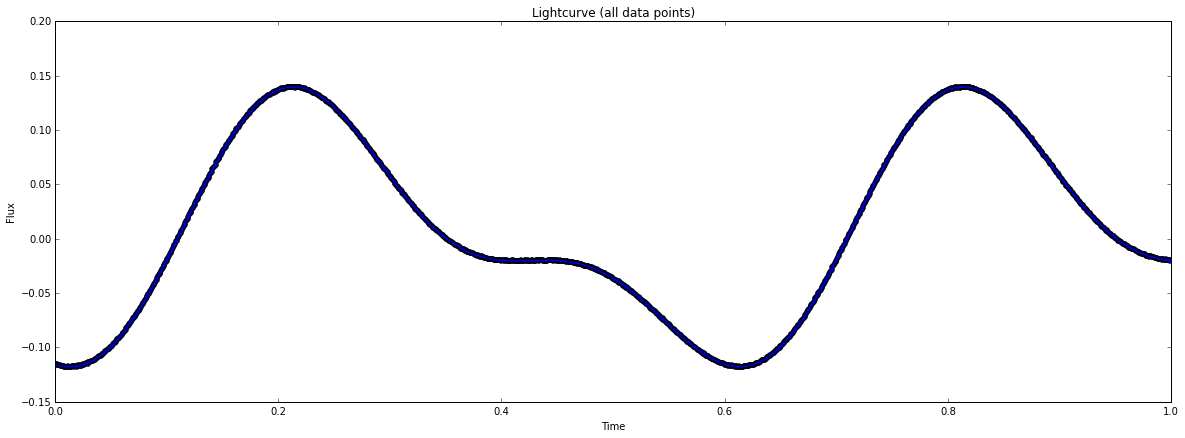

In [69]:
#plot the lightcurves

#plot lightcurve all data points
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(2,1,1)
ax.scatter(t,flux)
ax.plot(t,flux)


plt.title("Lightcurve (all data points)")
plt.xlabel("Time")
plt.ylabel("Flux")
plt.xlim([a,b])
plt.show()